In [8]:
import json
with open('/home/ubuntu/hyein/tsvt/multimodal/lstm/[newdata]오디오(H)+채팅-under/lstm_prob_test.json','rb') as f:
    ac_test = json.load(f)

In [9]:
import json
with open('/home/ubuntu/hyein/tsvt/multimodal/lstm/[newdata]오디오(H)+채팅-under/lstm_prob_train.json','rb') as f:
    ac_train = json.load(f)

In [10]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/highlight_add.pickle',"rb") as f:
    highlight_add = pickle.load(f)

In [11]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/exp_data/highlight_label.pickle',"rb") as f:
    label = pickle.load(f)

[ 115  229  304  393  940 1275 1342 1479 1565 1691]


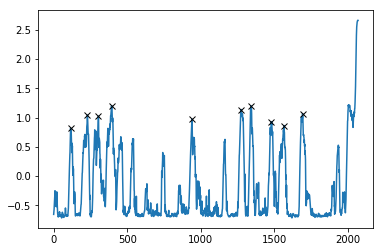

[ 712 1318]


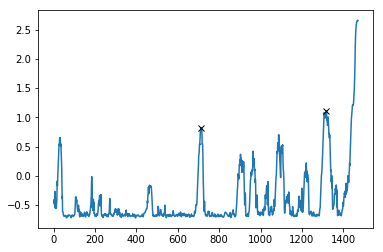

[ 356 1689]


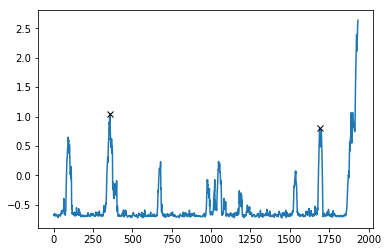

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

t=0
for key in ac_train.keys():
    peaks,_ = find_peaks(list(zip(*ac_train[key]))[1],prominence=1.4)
    print(peaks)
    plt.plot(np.array(list(zip(*ac_train[key]))[1]))
    plt.plot(peaks,np.array(list(zip(*ac_train[key]))[1])[peaks],"xk")
    plt.show()
    t+=1
    if t==3:
        break

In [13]:
train=['102844412722519367',
 '102844212429550795',
 '102844401151219358',
 '102844401154430631',
 '102844412717014335',
 '102844401153971877',
 '102844224148503678',
 '102844412722847048',
 '102844401152857762',
 '102844412707380528',
 '102844212431516886',
 '102844283027925085',
 '102844412716227901',
 '102844412710001974',
 '102844294670878922',
 '102844294670551241',
 '102844283023599703',
 '102844412704496937',
 '102844235751783874',
 '102844401152071328',
 '102844412709674293',
 '102844401153447587',
 '102844224148896895',
 '102844235746868664',
 '102979081290790284',
 '102844283027531868',
 '102844212431975640',
 '102844401155937960',
 '102844212429092040',
 '102844341906649746',
 '102844412706987311',
 '102844412721339716',
 '102844212430402768',
 '102844341905011343',
 '102844235753356742',
 '102844235750997440',
 '102844412709346612',
 '102844412705217835',
 '102844235752963525',
 '102844412712164667',
 '102844412705545516',
 '102844341912220311',
 '102844341907370644',
 '102844235749424575',
 '102844212429419722',
 '102844294669568199',
 '102844212431779031',
 '102844294666422466',
 '102844224146472059',
 '102844212428895431',
 '102844212429747404',
 '102844235748703677',
 '102844224146930812',
 '102844212430730450',
 '102844294674876621',
 '102844341909598870',
 '102844283020453971',
 '102844294670026952',
 '102844412723174729',
 '102844341904683662',
 '102844283025696858',
 '102844235747261881',
 '102844401154168486',
 '102844235748310460',
 '102844412711836986',
 '102844412723567946',
 '102844235749031358',
 '102844294674286796',
 '102844294666881219',
 '102844412716686654']


In [7]:
for parameter in range(5,20):
    parameter = parameter/10
    print(parameter)
    
    peakarr_test={}
    peakarr_train={}
    
    for key in ac_test.keys():
        peaks,_ = find_peaks(list(zip(*ac_test[key]))[1],prominence=parameter)
        peakarr_test[key] = peaks
        
    for key in ac_train.keys():
        peaks,_ = find_peaks(list(zip(*ac_train[key]))[1],prominence=parameter)
        peakarr_train[key] = peaks
        
    import pickle
    #변화율 데이터 저장
    with open('/home/ubuntu/gangmin/tsvt/video/highlight_statistic.pickle','rb') as f:
        delta = pickle.load(f)

    deltas_test = {}
    deltas_train={}
    
    for key in peakarr_test.keys():
        deltas_test[key] = delta[key]
        
    for key in peakarr_train.keys():
        deltas_train[key] = delta[key]

    data_test={}
    data_train ={}
    
    for key in peakarr_test.keys():
        data_test[key] = np.concatenate((peakarr_test[key],deltas_test[key]),axis=0)
        
    for key in peakarr_train.keys():
        data_train[key] = np.concatenate((peakarr_train[key],deltas_train[key]),axis=0)
        
        
    #statistics
    #labels

    highlight_before = 0
    highlight_after = 0
    highlight_stack =0 

    for game in data_train.keys():
        for i in data_train[game]:
            highlight_stack +=1
            check = 0
            accu = 0
            for ind,j in enumerate(label[game]):
                if j == 1 and  ind not in highlight_add[game] and ind < len(label[game])-46:
                    if ind == i:
                        highlight_before += accu
                        accu = 0
                        check = 1
                    else:
                        accu += 1
                else:
                    if check == 1:
                        highlight_after += accu
                        accu = 0
                        check = 0
                    accu = 0
    ##
    #print(highlight_before/highlight_stack,highlight_after/highlight_stack)
    hb = int(highlight_before/highlight_stack)-1
    ha = int(highlight_after/highlight_stack)

    result = {}
    for game in data_test.keys():

        highlight= []

        for i in data_test[game]:
            #default -14,10
            for j in range(i-hb,i+ha):
                highlight.append(j)


        result[game] = highlight + highlight_add[game]

    frames = {}


    for game in result.keys():
        temp =np.zeros(len(label[game]))
        for i,v in enumerate(temp):
            if i in result[game]:
                temp[i] = 1
        frames[game] = temp

    for key in frames.keys():
        frames[key] = frames[key][:len(label[key])]

    for key in frames.keys():
        # end highlight
        for end in range(len(frames[key])-46,len(frames[key])):
            frames[key][end] = 1

    average = [0,0,0,0,0]
    for key in frames.keys():
        TP = len(np.where((frames[key]==1)&(label[key]==1)==True)[0])
        FP = len(np.where((frames[key]==1)&(label[key]==0)==True)[0])
        TN = len(np.where((frames[key]==0)&(label[key]==0)==True)[0])
        FN = len(np.where((frames[key]==0)&(label[key]==1)==True)[0])


        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        accuracy = (TP+TN) / (TP+FN+FP+TN)

        if precision==0 and recall == 0:
            print('!')
        else:

            f1 = (2*precision*recall / (precision + recall))
            #print(key)
            #print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(precision,recall,f1,accuracy))
            average[0]+= precision
            average[1] += recall
            average[2] += f1
            average[3] += accuracy
            average[4]+=1
    print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(average[0]/average[4],average[1]/average[4],average[2]/average[4],average[3]/average[4]))


0.5
precision : 0.5282786207150018, recall : 0.78496123858592, f1 : 0.6279342865203362, accuracy : 0.843586032892661
0.6
precision : 0.5374007082457154, recall : 0.7929034867396548, f1 : 0.6363090899196664, accuracy : 0.8475344689311857
0.7
precision : 0.5559008061989515, recall : 0.7879058740248704, f1 : 0.6474896583372035, accuracy : 0.8557279750812163
0.8
precision : 0.5663425604352916, recall : 0.8027975523317475, f1 : 0.6596824272112017, accuracy : 0.8600217494291759
0.9
precision : 0.5747831774996826, recall : 0.7930348555924828, f1 : 0.6626999668716521, accuracy : 0.8642880510980222
1.0
precision : 0.5844224068016665, recall : 0.7886696801694313, f1 : 0.6678493125276502, accuracy : 0.8681357789598902
1.1
precision : 0.5729653753215381, recall : 0.8098917406002765, f1 : 0.6675887911914462, accuracy : 0.8641636578211684
1.2
precision : 0.584384640185926, recall : 0.8062916012759993, f1 : 0.6740466119473144, accuracy : 0.8688845583111952
1.3
precision : 0.5939327092642824, recall :

In [16]:
#statistics를 각각 구해서 적용해보기


for parameter in range(5,20):
    parameter = parameter/10
    print(parameter)
    
    peakarr_test={}
    peakarr_train={}
    
    for key in ac_test.keys():
        peaks,_ = find_peaks(list(zip(*ac_test[key]))[1],prominence=parameter)
        peakarr_test[key] = peaks
        
    for key in ac_train.keys():
        peaks,_ = find_peaks(list(zip(*ac_train[key]))[1],prominence=parameter)
        peakarr_train[key] = peaks
        
    import pickle
    #변화율 데이터 저장
    with open('/home/ubuntu/gangmin/tsvt/video/highlight_statistic.pickle','rb') as f:
        delta = pickle.load(f)

    deltas_test = {}
    deltas_train={}
    
    for key in peakarr_test.keys():
        deltas_test[key] = delta[key]
        
    for key in peakarr_train.keys():
        deltas_train[key] = delta[key]
    
    '''
    data_test={}
    data_train ={}
    
    for key in peakarr_test.keys():
        data_test[key] = np.concatenate((peakarr_test[key],deltas_test[key]),axis=0)
        
    for key in peakarr_train.keys():
        data_train[key] = np.concatenate((peakarr_train[key],deltas_train[key]),axis=0)
    ''' 
        
    #statistics
    #labels

    highlight_before = 0
    highlight_after = 0
    highlight_stack =0 

    for game in deltas_train.keys():
        for i in deltas_train[game]:
            highlight_stack +=1
            check = 0
            accu = 0
            for ind,j in enumerate(label[game]):
                if j == 1 and  ind not in highlight_add[game] and ind < len(label[game])-46:
                    if ind == i:
                        highlight_before += accu
                        accu = 0
                        check = 1
                    else:
                        accu += 1
                else:
                    if check == 1:
                        highlight_after += accu
                        accu = 0
                        check = 0
                    accu = 0
    ##
    #print(highlight_before/highlight_stack,highlight_after/highlight_stack)
    hb = int(highlight_before/highlight_stack)-1
    ha = int(highlight_after/highlight_stack)
    
    result = {}
    for game in deltas_test.keys():

        highlight= []

        for i in deltas_test[game]:
            #default -14,10
            for j in range(i-hb,i+ha):
                highlight.append(j)
        result[game] = highlight + highlight_add[game]
    
    
    highlight_before = 0
    highlight_after = 0
    highlight_stack =0 

    for game in peakarr_train.keys():
        for i in peakarr_train[game]:
            highlight_stack +=1
            check = 0
            accu = 0
            for ind,j in enumerate(label[game]):
                if j == 1 and  ind not in highlight_add[game] and ind < len(label[game])-46:
                    if ind == i:
                        highlight_before += accu
                        accu = 0
                        check = 1
                    else:
                        accu += 1
                else:
                    if check == 1:
                        highlight_after += accu
                        accu = 0
                        check = 0
                    accu = 0
    ##
    #print(highlight_before/highlight_stack,highlight_after/highlight_stack)
    hb = int(highlight_before/highlight_stack)-1
    ha = int(highlight_after/highlight_stack)

    
    for game in peakarr_test.keys():

        highlight= []

        for i in peakarr_test[game]:
            #default -14,10
            for j in range(i-hb,i+ha):
                highlight.append(j)


        result[game] = result[game] + highlight
        

    frames = {}


    for game in result.keys():
        temp =np.zeros(len(label[game]))
        for i,v in enumerate(temp):
            if i in result[game]:
                temp[i] = 1
        frames[game] = temp

    for key in frames.keys():
        frames[key] = frames[key][:len(label[key])]

    for key in frames.keys():
        # end highlight
        for end in range(len(frames[key])-46,len(frames[key])):
            frames[key][end] = 1

    average = [0,0,0,0,0]
    for key in frames.keys():
        TP = len(np.where((frames[key]==1)&(label[key]==1)==True)[0])
        FP = len(np.where((frames[key]==1)&(label[key]==0)==True)[0])
        TN = len(np.where((frames[key]==0)&(label[key]==0)==True)[0])
        FN = len(np.where((frames[key]==0)&(label[key]==1)==True)[0])


        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        accuracy = (TP+TN) / (TP+FN+FP+TN)

        if precision==0 and recall == 0:
            print('!')
        else:

            f1 = (2*precision*recall / (precision + recall))
            #print(key)
            #print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(precision,recall,f1,accuracy))
            average[0]+= precision
            average[1] += recall
            average[2] += f1
            average[3] += accuracy
            average[4]+=1
    print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(average[0]/average[4],average[1]/average[4],average[2]/average[4],average[3]/average[4]))


0.5
precision : 0.5503685656189343, recall : 0.7891348850861243, f1 : 0.644383522777286, accuracy : 0.8544973808900035
0.6
precision : 0.5573824440398785, recall : 0.7917736334420606, f1 : 0.6495306236836031, accuracy : 0.8572048235071895
0.7
precision : 0.564809993594844, recall : 0.7945197190093599, f1 : 0.6554217294163748, accuracy : 0.8602263734340538
0.8
precision : 0.577293483422545, recall : 0.7941697627538918, f1 : 0.6637877063575349, accuracy : 0.8649608991380277
0.9
precision : 0.5782746164950993, recall : 0.7912030639595918, f1 : 0.6638805280409218, accuracy : 0.8658418607539207
1.0
precision : 0.5823696459656736, recall : 0.794377404431475, f1 : 0.6680152181911122, accuracy : 0.8677116916887359
1.1
precision : 0.5852596811819187, recall : 0.797053854018715, f1 : 0.6710178752268745, accuracy : 0.8688609806440685
1.2
precision : 0.591626810515324, recall : 0.7989510127495604, f1 : 0.6759370842314929, accuracy : 0.8715054299448017
1.3
precision : 0.5995601761036968, recall : 0